This is a Machine Learning Model for Gold Price Prediction

**WorkFLow**

Gold Price data -> Data Pre-processing -> Data Analysis -> Train-test split -> Random Forest Regressor

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
gold_dataset = pd.read_csv("gld_price_data.csv")

In [3]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_dataset.shape

(2290, 6)

In [5]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Correlation
1) Positive

2) Negative

In [7]:
correlation = gold_dataset.drop(columns='Date',axis=1).corr()

<Axes: >

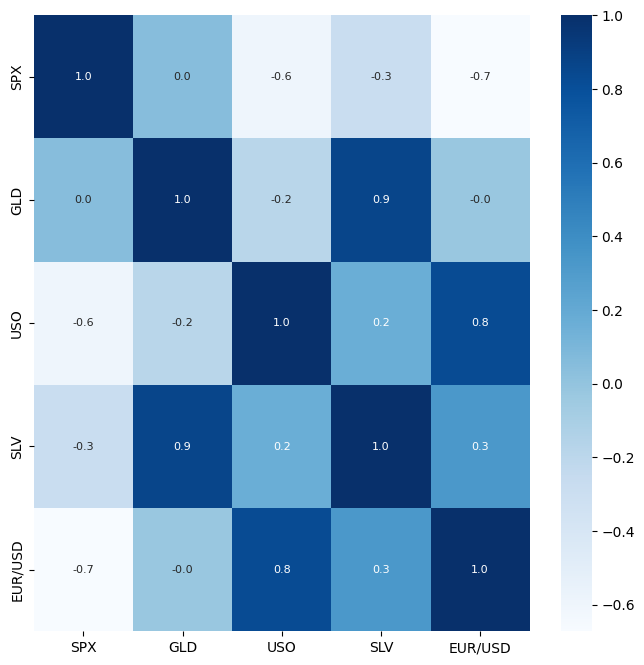

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [9]:
#correlation values of GLD(Gold)
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


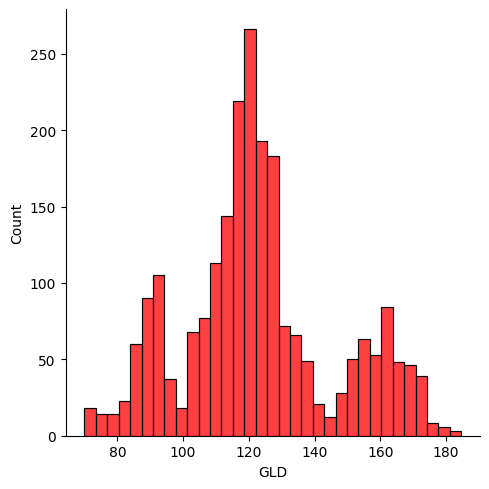

In [10]:
#checking the distribution of GLD price
sns.displot(gold_dataset['GLD'],color='red')

Splitting of Data and Target

In [11]:
X = gold_dataset.drop(columns=['GLD','Date'],axis=1)
Y = gold_dataset['GLD']

In [12]:
print(X.shape,Y.shape)

(2290, 4) (2290,)


In [13]:
X


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [14]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

train_test_split

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [16]:
X_train.shape

(1832, 4)

In [17]:
X_test.shape

(458, 4)

Training the Model

Random Forest Algorithm

![WhatsApp Image 2024-06-22 at 23.55.29_74b4f3f6.jpg](<attachment:WhatsApp Image 2024-06-22 at 23.55.29_74b4f3f6.jpg>)
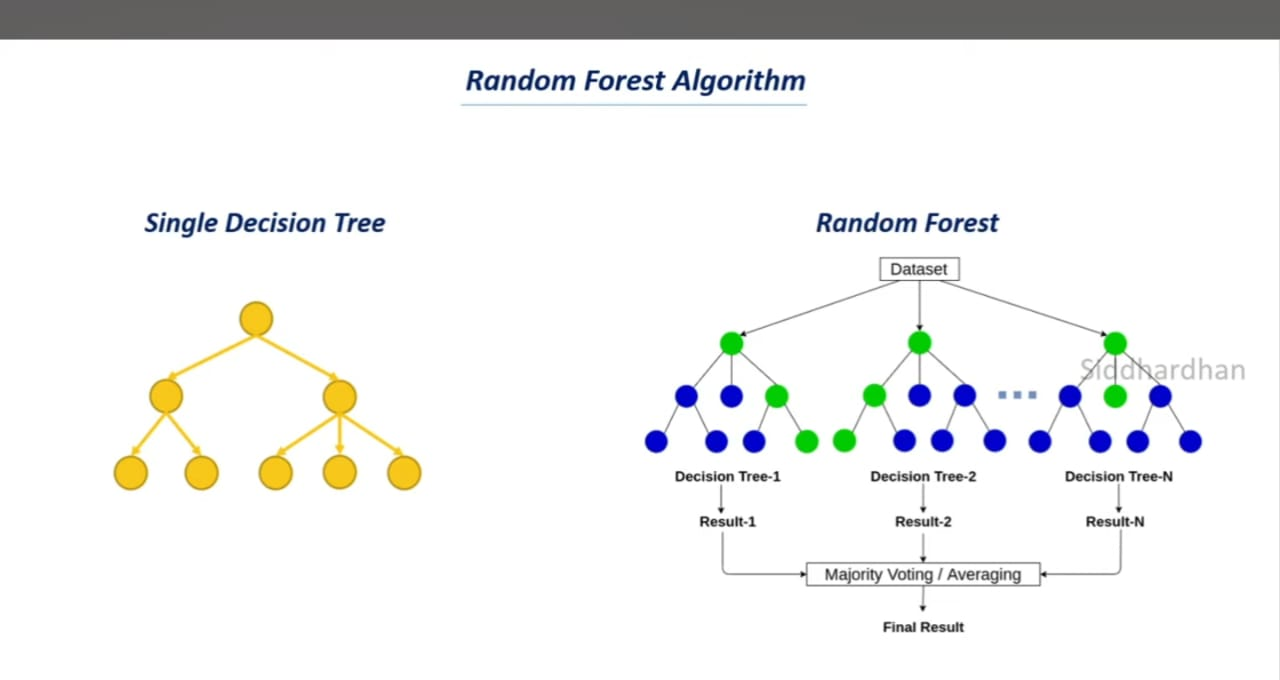

In [18]:
model = RandomForestRegressor()

In [19]:
model.fit(X_train,Y_train)

RandomForestRegressor()

Analyzing the model

In [20]:
X_train_prediction = model.predict(X_train)
X_train_accuracy = metrics.r2_score(Y_train,X_train_prediction)
print("The r2 square error of the training dataset is ",X_train_accuracy)

The r2 square error of the training dataset is  0.998394418861353


In [21]:
X_test_prediction = model.predict(X_test)
X_test_accuracy = metrics.r2_score(Y_test,X_test_prediction)
print("The r2 square error of the testing dataset is ",X_test_accuracy)

The r2 square error of the testing dataset is  0.9888350438315717


Visualizing the model

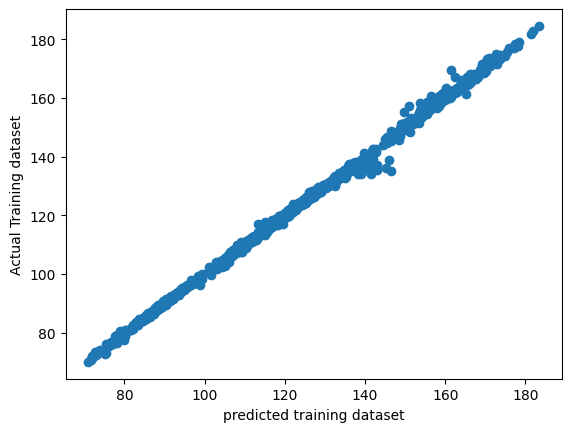

In [22]:
plt.scatter(X_train_prediction,Y_train)
plt.xlabel("predicted training dataset")
plt.ylabel("Actual Training dataset")
plt.show()

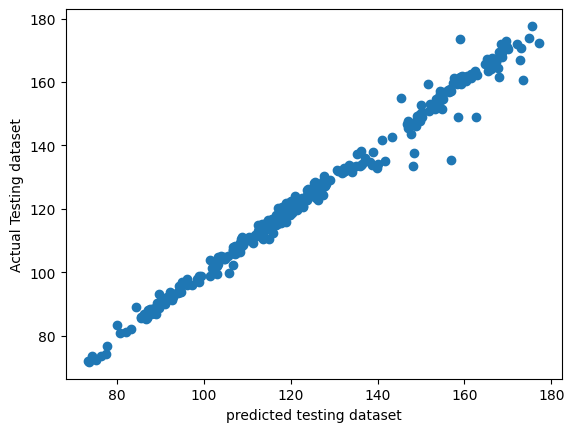

In [23]:
plt.scatter(X_test_prediction,Y_test)
plt.xlabel("predicted testing dataset")
plt.ylabel("Actual Testing dataset")
plt.show()

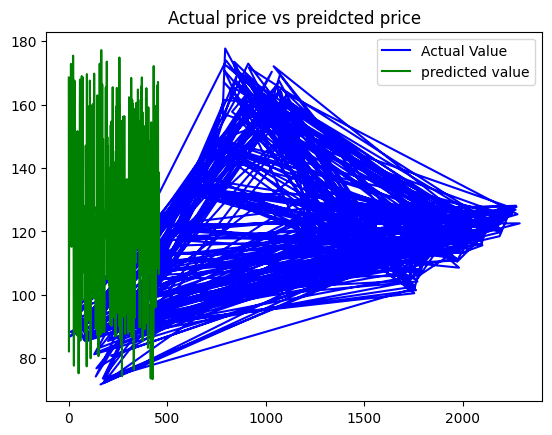

In [24]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(X_test_prediction,color='green',label='predicted value')
plt.title('Actual price vs preidcted price')
plt.legend()
plt.show()